### <font color='blue'>Health Analytics</font>

In [1]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Loading the Data Set

In [2]:
data = pd.read_csv('data/dataset.csv')

In [3]:
data.shape

(583, 11)

In [4]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
data.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
518,45,Male,2.9,1.4,210,74,68,7.2,3.6,1.00,1
428,52,Female,0.6,0.1,194,10,12,6.9,3.3,0.90,2
204,21,Male,0.7,0.2,135,27,26,6.4,3.3,1.00,2
377,20,Female,0.6,0.2,202,12,13,6.1,3.0,0.90,2
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
456,32,Male,0.7,0.2,189,22,43,7.4,3.1,0.70,2
544,54,Female,5.5,3.2,350,67,42,7.0,3.2,0.80,1
369,58,Female,0.8,0.2,130,24,25,7.0,4.0,1.30,1
208,70,Female,0.9,0.3,220,53,95,6.1,2.8,0.68,1
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.60,1


## Exploratory Data Analysis

In [6]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [7]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [8]:
# Categorical variables
data.dtypes[data.dtypes == 'object']

Gender    object
dtype: object

In [9]:
# Non-categorical variables
data.dtypes[data.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploration of Numerical Variables

In [10]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


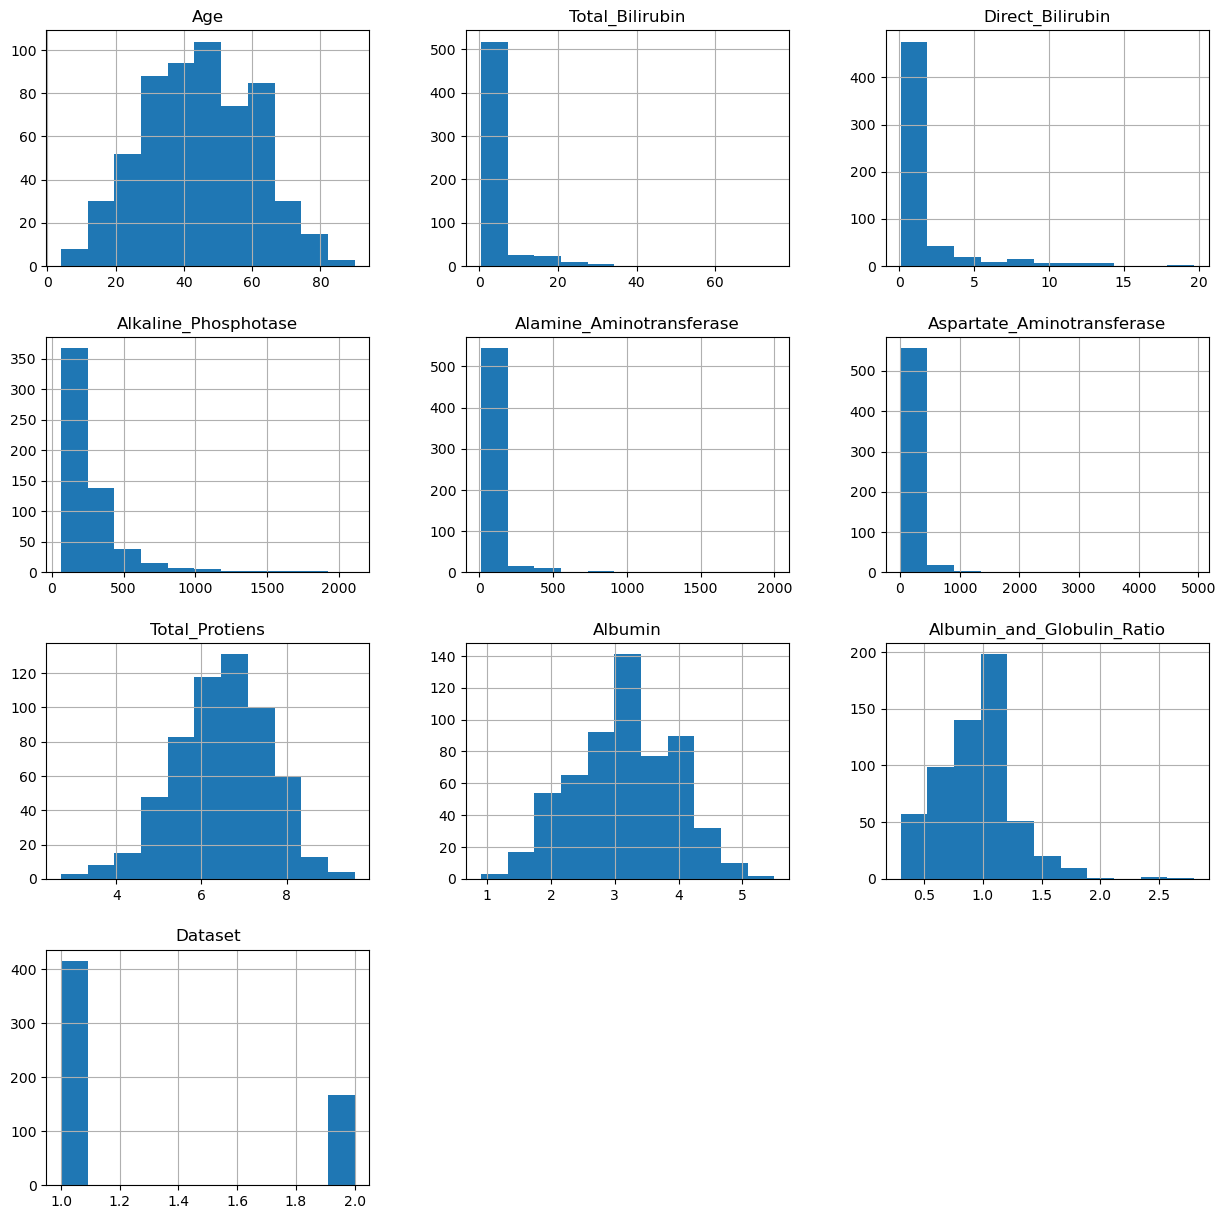

In [11]:
data.hist(figsize = (15,15), bins = len(data.columns))
plt.show()

It seems that there is an outlier in the variables **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, as the maximum value is much higher than the average value.

The dataset column (target variable) has '1' for liver disease and '2' for no liver disease. Let's adjust the variable by putting values that are easier to interpret. The negative class (does not have the disease) will be zero.

In [12]:
# Function to adjust target variable
def adjust_var(x):
    if x == 2:
        return 0
    return 1

In [13]:
# Apply the function
data['Dataset'] = data['Dataset'].map(adjust_var)

In [14]:
# Let's adjust the target variable name
data.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [15]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
321,30,Female,0.8,0.2,198,30,58,5.2,2.8,1.1,1
260,42,Male,16.4,8.9,245,56,87,5.4,2.0,0.5,1
523,50,Male,0.6,0.2,137,15,16,4.8,2.6,1.1,1
483,30,Male,0.8,0.2,182,46,57,7.8,4.3,1.2,0
258,36,Male,0.8,0.2,182,31,34,6.4,3.8,1.4,0


In [16]:
# Correlation between variables
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Categorical Variable Exploration

In [17]:
data.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Number of male patients:  441
Number of female patients:  142


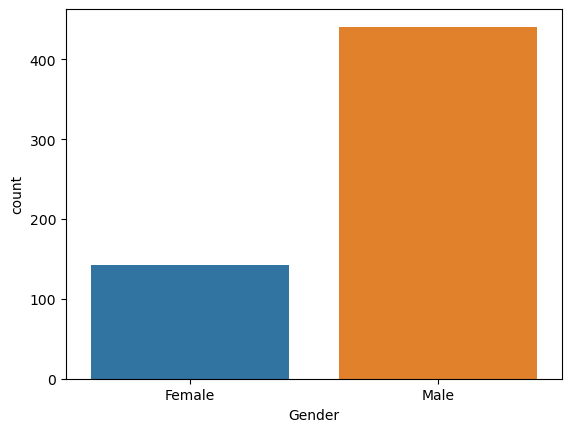

In [18]:
# Plot
sns.countplot(data = data, x = 'Gender', label = 'Count')

# Value counts
M, F = data['Gender'].value_counts()

# Print
print('Number of male patients: ', M)
print('Number of female patients: ', F)

441
142


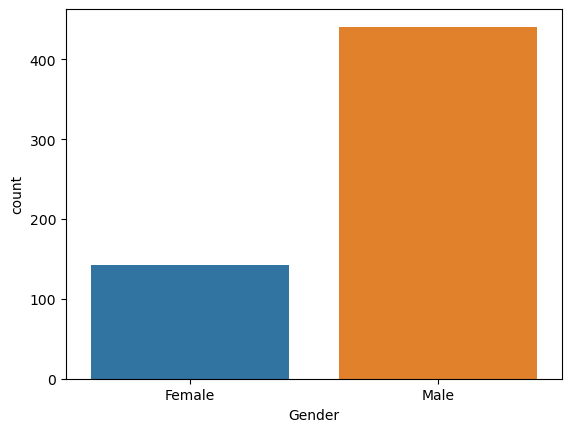

In [19]:
sns.countplot(data = data, x = 'Gender', label = 'count')

M, F = data['Gender'].value_counts()

print(M)
print(F)

Let's take advantage of this and transform the categorical variable into its numeric representation using label encoding. Not only will it cut down on work later, it will make it easier to create charts to follow.

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplica a função
data['Gender'] = data['Gender'].map(encoding_func)

In [22]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
366,16,0,0.7,0.2,418,28,35,7.2,4.1,1.3,0
117,32,0,12.7,6.2,194,2000,2946,5.7,3.3,1.3,1
399,27,0,1.0,0.2,205,137,145,6.0,3.0,1.0,1
468,66,0,1.0,0.3,190,30,54,5.3,2.1,0.6,1
532,62,0,0.7,0.2,162,12,17,8.2,3.2,0.6,0


### Checking the Relationship Between Attributes

In [23]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


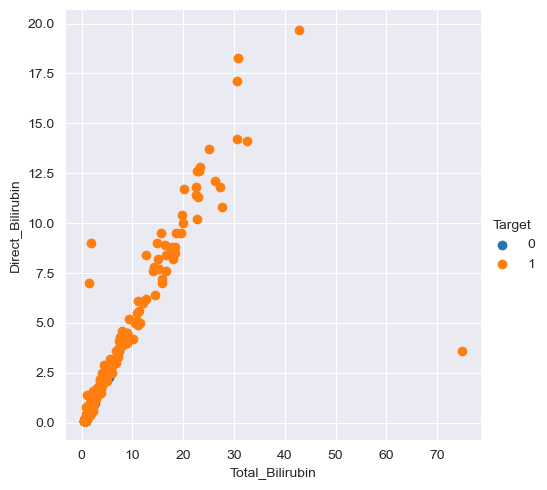

In [24]:
# Set the background style
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(
    data, hue = 'Target', size = 5).map(
    plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()    

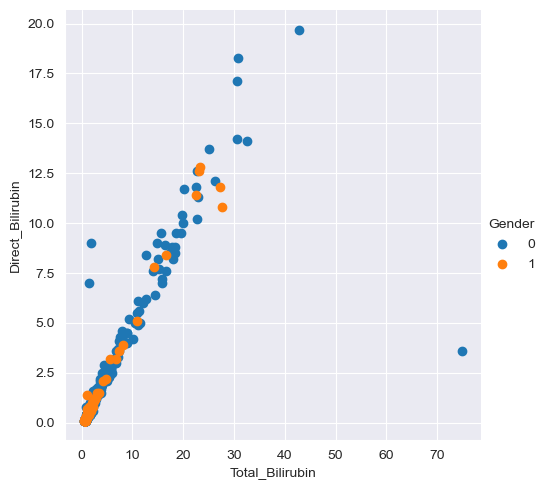

In [25]:
# Set the background style
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(
    data, hue = 'Gender', size = 5).map(
    plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

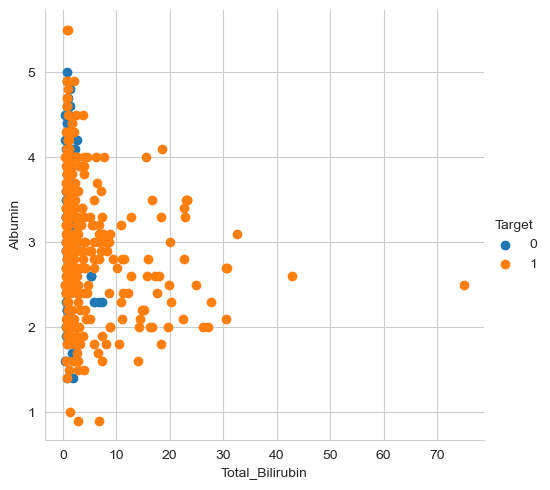

In [26]:
# Set the background style
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(
    data, hue = 'Target', size = 5).map(
    plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

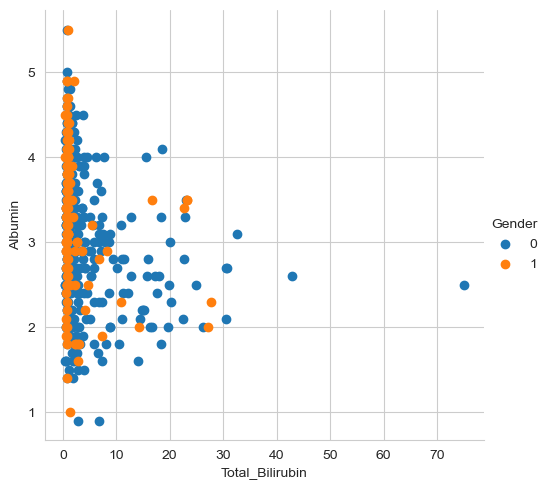

In [27]:
# Set the background style
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(
    data, hue = 'Gender', size = 5).map(
    plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Checking for Missing Values and Duplicate Records

In [28]:
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [29]:
# Checking for duplicate records (complete cases)
# Complete cases also refer to lines where there are no missing values
data[data.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Data Cleanup

### Duplicate Records Handling

In [30]:
data.shape

(583, 11)

In [31]:
# Remove duplicate records (remove one of the duplicates)
data = data.drop_duplicates()
print(data.shape)

(570, 11)


### Handling Outliers

In [32]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

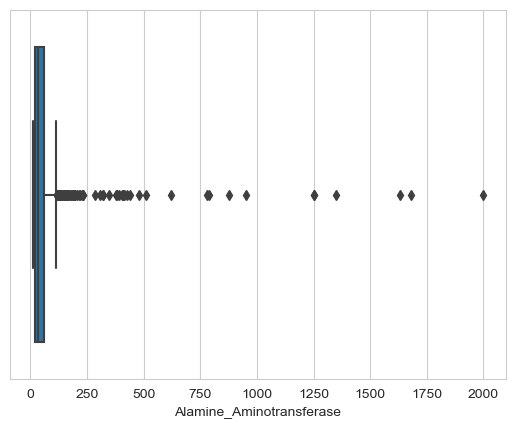

In [33]:
# Boxplot
sns.boxplot(data.Alamine_Aminotransferase)

Are the extreme values really outliers?

In [34]:
# Frequency count by value
data.Alamine_Aminotransferase.sort_values(ascending = False).head()

117    2000
27     1680
47     1630
118    1350
135    1250
Name: Alamine_Aminotransferase, dtype: int64

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

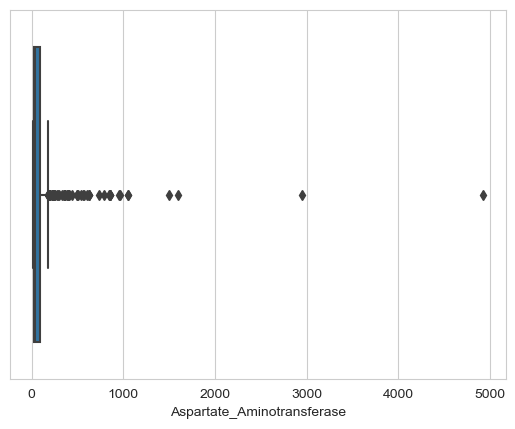

In [35]:
# Boxplot
sns.boxplot(data.Aspartate_Aminotransferase)

In [36]:
# Frequency count by value
data.Aspartate_Aminotransferase.sort_values(ascending = False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [37]:
# Keep only records where the value is less than or equal to 3000
data = data[data.Aspartate_Aminotransferase <= 3000]
data.shape

(569, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

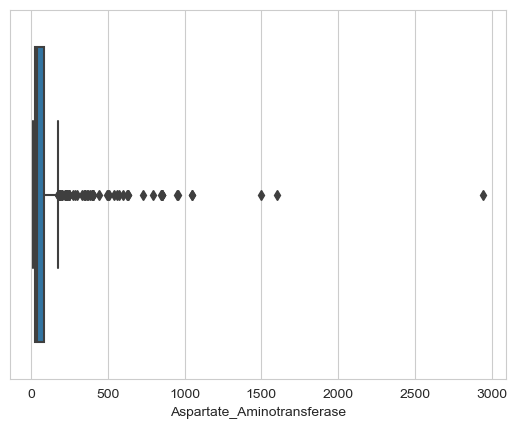

In [38]:
# Boxplot
sns.boxplot(data.Aspartate_Aminotransferase)

In [39]:
# Frequency count by value
data.Aspartate_Aminotransferase.sort_values(ascending = False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [40]:
# Keep only records where the value is less than or equal to 2500
data = data[data.Aspartate_Aminotransferase <= 2500]
data.shape

(568, 11)

In [41]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.834507,0.246479,3.291197,1.482042,290.482394,74.286972,95.901408,6.496831,3.150000,0.948174,0.711268
std,16.237569,0.431340,6.257583,2.826056,243.271522,155.240601,171.956479,1.089500,0.797571,0.319301,0.453573
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,1.000000


### Handling Missing Values

In [42]:
# Check for missing value
data.isnull().values.any()

True

In [43]:
# Check how many columns have missing value
data.isnull().values.any().sum()

1

In [44]:
# List missing values
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [45]:
data.shape

(568, 11)

In [46]:
# Drop dos registros com valores ausentes em qualquer coluna (any)
data = data.dropna(how = 'any')  

In [47]:
data.shape

(564, 11)

In [48]:
# List missing values
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target


In [49]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
368,42,1,0.8,0.2,182,22,20,7.2,3.9,1.1,1
562,66,0,17.3,8.5,388,173,367,7.8,2.6,0.5,1
309,48,1,1.1,0.7,527,178,250,8.0,4.2,1.1,1
547,50,1,27.7,10.8,380,39,348,7.1,2.3,0.4,1
121,32,0,22.7,10.2,290,322,113,6.6,2.8,0.7,1


## Pre-Processing Data for Building Machine Learning Models

In [50]:
# Given the high correlation between the variables Direct_Bilirubin and Total_Bilirubin, let's remove Direct_Bilirubin
data = data.drop('Direct_Bilirubin', 1)

In [51]:
data.shape

(564, 10)

### Split into Training and Test

In [52]:
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [53]:
# Create a separate object for the target variable
y = data.Target

In [54]:
# Create a separate object for input variables
X = data.drop('Target', axis = 1)

In [55]:
# Split into training and test data with stratified sampling
X_training, X_test, y_training, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = data.Target)

In [56]:
len(X_training)

423

In [57]:
len(X_test)

141

In [58]:
# Print shape
print(X_training.shape, X_test.shape, y_training.shape, y_test.shape)

(423, 9) (141, 9) (423,) (141,)


In [59]:
X_training.head(2)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
205,45,0,2.5,163,28,22,7.6,4.0,1.1
390,72,0,0.8,148,23,35,6.0,3.0,1.0


### Class Balancing

In [60]:
y_training.value_counts()

1    301
0    122
Name: Target, dtype: int64

In [61]:
# Install the package
# !pip install -q imblearn

In [62]:
# Load the SMOTE function
import imblearn
from imblearn.over_sampling import SMOTE

In [63]:
# Let's apply the oversampling technique and increase the number of examples of the minority class
over_sampler = SMOTE(k_neighbors = 2)

In [64]:
# Apply oversampling (should only be done with training data)
X_res, y_res = over_sampler.fit_resample(X_training, y_training)

In [65]:
len(X_res)

602

In [66]:
len(y_res)

602

In [67]:
y_res.value_counts()

1    301
0    301
Name: Target, dtype: int64

In [68]:
# Set the training dataset name to X
X_training = X_res

In [69]:
# Set the training dataset name to y
y_training = y_res

### Data Standardization

In [70]:
X_training.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,45,0,2.5,163,28,22,7.6,4.0,1.1
1,72,0,0.8,148,23,35,6.0,3.0,1.0
2,18,0,0.8,282,72,140,5.5,2.5,0.8
3,42,0,8.9,272,31,61,5.8,2.0,0.5
4,42,0,0.8,127,29,30,4.9,2.7,1.2


In [71]:
# Calculate mean and standard deviation of training data
trng_mean = X_training.mean()
trng_std = X_training.std()
print('Training mean \n', trng_mean)
print('')
print('Training standard deviation\n', trng_std)

Training mean 
 Age                            43.627907
Gender                          0.224252
Total_Bilirubin                 2.658672
Alkaline_Phosphotase          263.900332
Alamine_Aminotransferase       61.599668
Aspartate_Aminotransferase     77.200997
Total_Protiens                  6.479020
Albumin                         3.217888
Albumin_and_Globulin_Ratio      0.994775
dtype: float64

Training standard deviation
 Age                            16.517658
Gender                          0.417436
Total_Bilirubin                 5.567300
Alkaline_Phosphotase          218.355021
Alamine_Aminotransferase      140.027229
Aspartate_Aminotransferase    144.165766
Total_Protiens                  1.057241
Albumin                         0.782242
Albumin_and_Globulin_Ratio      0.313778
dtype: float64


In [72]:
# Standardization
X_training = (X_training - trng_mean) / trng_std

In [73]:
X_training.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.083068,-0.537214,-0.028501,-0.462093,-0.239951,-0.382899,1.060288,0.999833,0.335347
1,1.717683,-0.537214,-0.333855,-0.530788,-0.275658,-0.292726,-0.453085,-0.278543,0.016650
2,-1.551546,-0.537214,-0.333855,0.082891,0.074274,0.435603,-0.926015,-0.917732,-0.620742
3,-0.098556,-0.537214,1.121069,0.037094,-0.218527,-0.112378,-0.642257,-1.556920,-1.576831
4,-0.098556,-0.537214,-0.333855,-0.626962,-0.232809,-0.327408,-1.493530,-0.662056,0.654043


In [74]:
# Describe
X_training.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02
mean,3.245835e-17,7.952295e-16,-7.263477e-16,-7.662752e-17,1.447716e-17,5.256039e-17,-1.825044e-15,-3.308907e-15,5.540050e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.399124e+00,-5.372141e-01,-4.057033e-01,-9.200628e-01,-3.684974e-01,-4.661370e-01,-3.574418e+00,-2.963134e+00,-2.214224e+00
25%,-7.645095e-01,-5.372141e-01,-3.465158e-01,-4.334699e-01,-2.827998e-01,-3.690266e-01,-6.422570e-01,-6.620564e-01,-6.207423e-01
50%,8.306825e-02,-5.372141e-01,-3.158931e-01,-3.109630e-01,-2.185266e-01,-2.857890e-01,2.106076e-02,-2.286799e-02,1.665030e-02
75%,7.490222e-01,-5.372141e-01,-1.380940e-01,4.739835e-02,-6.855572e-02,-7.769526e-02,6.819448e-01,8.246756e-01,5.863941e-01
max,2.807425e+00,1.858363e+00,1.299397e+01,8.454579e+00,1.155775e+01,1.056283e+01,2.952005e+00,2.917399e+00,5.753184e+00


We use mean and deviation of the training data to standardize the test data.

In [75]:
X_test = (X_test - trng_mean) / trng_std

In [76]:
# Describe
X_test.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
220,-0.401262,-0.537214,-0.333855,-0.535368,-0.247092,-0.216424,-1.398944,-0.917732,0.016650
448,0.264692,1.858363,-0.333855,-0.558267,-0.254234,-0.362090,-0.453085,-0.789894,-0.939439
509,0.143610,-0.537214,3.114854,-0.045341,0.559893,3.210187,-1.020600,-0.278543,0.654043
415,1.596600,-0.537214,-0.244045,1.951408,0.224244,-0.258043,-2.723146,-0.662056,-0.939439
56,-0.643427,-0.537214,-0.333855,-0.301804,-0.254234,-0.375963,1.438632,0.999833,0.016650


### Construction, Training and Evaluation of Model 1 with Logistic Regression (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

For the first version of the model, the ideal is to choose a simple, easy-to-understand algorithm that will be used as a benchmark.

In [77]:
# Define list of hyperparameters
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [78]:
# We will create the model with GridSearch
# Several models will be created with different combinations of hyperparameters
## Template with the best combination of hyperparameters for this data
model_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [79]:
# Model training
model_v1.fit(X_training, y_training)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [80]:
# We select the best model
model_v1.best_estimator_

LogisticRegression(C=1)

In [81]:
# Predictions with test data
y_pred_v1 = model_v1.predict(X_test)

In [82]:
# Show the first 10 predictions
y_pred_v1[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [83]:
# Get predictions in probability format for each class
y_pred_prob_v1 = model_v1.predict_proba(X_test)

In [84]:
# Show the first 10 predictions
y_pred_prob_v1[:10]

array([[7.80137370e-01, 2.19862630e-01],
       [5.52124696e-01, 4.47875304e-01],
       [9.66757609e-05, 9.99903324e-01],
       [4.87309075e-01, 5.12690925e-01],
       [6.43411342e-01, 3.56588658e-01],
       [5.69781440e-01, 4.30218560e-01],
       [7.61679277e-01, 2.38320723e-01],
       [6.17239408e-02, 9.38276059e-01],
       [6.20301994e-01, 3.79698006e-01],
       [4.46080296e-03, 9.95539197e-01]])

In [85]:
# We get the predictions in probability format by filtering for the positive class
# We need this to calculate the ROC Curve
y_pred_prob_v1 = model_v1.predict_proba(X_test)[:,1]

In [86]:
# Shows the first 10 predictions
y_pred_prob_v1[:10]

array([0.21986263, 0.4478753 , 0.99990332, 0.51269092, 0.35658866,
       0.43021856, 0.23832072, 0.93827606, 0.37969801, 0.9955392 ])

In [87]:
# As an example, let's check one of the data points (change the value of i if you wish)
i = 16
print('For data point {}, actual class = {}, predicted class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred_v1[i], y_pred_prob_v1[i]))

For data point 16, actual class = 1, predicted class = 1, predicted probability = 0.6364019170421531


In [88]:
# confusion matrix
confusion_matrix(y_test, y_pred_v1)

array([[31,  9],
       [41, 60]], dtype=int64)

In [89]:
# Extracting each value from the CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()

In [90]:
print(tn, fp, fn, tp)

31 9 41 60


In [91]:
# Calculates the global metric AUC (Area Under The Curve) with real data and test predictions
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print(roc_auc_v1)

0.684529702970297


In [92]:
# Calculate the ROC curve with test data and predictions
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_prob_v1)

In [93]:
# AUC test
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7349009900990099


In [94]:
# Accuracy in test
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(accuracy_v1)

0.6453900709219859


### Feature Importance

In [95]:
# Building the model again with the best hyperparameters
# This is necessary as the final version must not have GridSearchCV
model_v1 = LogisticRegression(C = 1000)
model_v1.fit(X_training, y_training)

LogisticRegression(C=1000)

In [96]:
# Get the coefficients by greatest greatest using np.argsort
indexes = np.argsort(-abs(model_v1.coef_[0,:]))

In [97]:
print("Most important variables for the result of model_v1:")
print(50*'-')
for feature in X.columns[indexes]:
    print(feature)

Most important variables for the result of model_v1:
--------------------------------------------------
Alamine_Aminotransferase
Total_Bilirubin
Albumin
Total_Protiens
Aspartate_Aminotransferase
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio
Age
Gender


In [98]:
# Save the model to disk
with open('models/model_v1.pkl', 'wb') as pickle_file:
      joblib.dump(model_v1, 'models/model_v1.pkl') 

In [99]:
# Create a dataframe to receive metrics from each model
df_models = pd.DataFrame()

In [100]:
# Dictionary with model_v1 metrics
dict_model_v1 = {'Name': 'model_v1', 
                  'Algorithm': 'Logistic Regression', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Accuracy': accuracy_v1}

In [101]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v1, ignore_index = True)

In [102]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.68453,0.734901,0.64539


### Construction, Training and Evaluation of Model 2 with Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Our challenge now is to try to get a better model than version 1. Let's try the Random Forest algorithm.

In [103]:
# Hyperparameter Grid
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [104]:
# Create the model with RandomizedSearchCV to search for the best combination of hyperparameters
model_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [105]:
# Train the model
model_v2.fit(X_training, y_training)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [106]:
# Extract the best model
model_v2.best_estimator_

RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [107]:
# Forecasts in test
y_pred_v2 = model_v2.predict(X_test)

In [108]:
# Get predictions for the positive class
y_pred_prob_v2 = model_v2.predict_proba(X_test)[:,1]

In [109]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v2)

array([[19, 21],
       [18, 83]], dtype=int64)

In [110]:
# ROC curve on test data and predictions
roc_auc_v2 = roc_auc_score(y_test, y_pred_v2)
print(roc_auc_v2)

0.6483910891089109


In [111]:
# ROC curve on test data and predictions
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_prob_v2)

In [112]:
# AUC under test
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7495049504950496


In [113]:
# Accuracy in test
accuracy_v2 = accuracy_score(y_test, y_pred_v2)
print(accuracy_v2)

0.723404255319149


### Feature Importance

In [114]:
# Recreate the model with the best hyperparameters
model_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4)
model_v2.fit(X_training, y_training)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [115]:
# Most relevant variables
indexes = np.argsort(-model_v2.feature_importances_)
print("Most important variables for the model_v2 result:")
print(50*'-')
for feature in X.columns[indexes]:
    print(feature)

Most important variables for the model_v2 result:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Albumin_and_Globulin_Ratio
Total_Protiens
Albumin
Gender


In [116]:
# Save the model to disk
with open('models/model_v2.pkl', 'wb') as pickle_file:
      joblib.dump(model_v2, 'models/model_v2.pkl') 

In [117]:
# Dictionary with model_v2 metrics
dict_model_v2 = {'Name': 'model_v2', 
                  'Algorithm': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Accuracy': accuracy_v2}

In [118]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v2, ignore_index = True)

In [119]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.684530,0.734901,0.645390
1,model_v2,Random Forest,0.648391,0.749505,0.723404


### Construction, Training and Evaluation of Model 3 with KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Let's now try a simpler algorithm, KNN. For this algorithm, we first need to define the value of K, which is the number of nearest neighbors.

In [120]:
# List of possible values of K
neighbors1 = list(range(1, 20, 2))

In [121]:
# List for scores
cv_scores = []

In [122]:
# Cross-validation to determine the best value of k
for k in neighbors1:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_training, y_training, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [123]:
# Adjusting the sort error
errors = [1 - x for x in cv_scores]

In [124]:
# Determining the best value of k (with the smallest error)
optimal_k = neighbors1[errors.index(min(errors))]
print('The ideal value of k is %d' % optimal_k)

The ideal value of k is 1


In [125]:
# We create the model version 3
model_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [126]:
# Training
model_v3.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=1)

In [127]:
# Forecasts
y_pred_v3 = model_v3.predict(X_test)

In [128]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v3)

array([[19, 21],
       [36, 65]], dtype=int64)

In [129]:
# Positive class probability prediction
y_pred_prob_v3 = model_v3.predict_proba(X_test)[:,1]

In [130]:
# Calculate ROC_AUC in test
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
print(roc_auc_v3)

0.5592821782178218


In [131]:
# Calculate ROC curve
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_prob_v3)

In [132]:
# Calculate AUC on test
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5592821782178218


In [133]:
# Calculate accuracy
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(accuracy_v3)

0.5957446808510638


Note: With the KNN algorithm we did not extract the most important variables, because the concept of the algorithm is different.

In [134]:
# Save the model to disk
with open('models/model_v3.pkl', 'wb') as pickle_file:
      joblib.dump(model_v3, 'models/model_v3.pkl') 

In [135]:
# Dictionary with model_v3 metrics
dict_model_v3 = {'Name': 'model_v3', 
                  'Algorithm': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Accuracy': accuracy_v3}

In [136]:
# Adiciona o dict ao dataframe
df_models = df_models.append(dict_model_v3, ignore_index = True)

In [137]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.684530,0.734901,0.645390
1,model_v2,Random Forest,0.648391,0.749505,0.723404
2,model_v3,KNN,0.559282,0.559282,0.595745


### Construction, Training and Evaluation of Model 4 with Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In version 4 of the model we will use a decision tree model.

In [138]:
# hyperparameters
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [139]:
# Create the model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [140]:
# Training
model_v4.fit(X_training, y_training)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [141]:
# best model
model_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)

In [142]:
# Class predictions
y_pred_v4 = model_v4.predict(X_test)

In [143]:
# Probability predictions
y_pred_prob_v4 = model_v4.predict_proba(X_test)[:,1]

In [144]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v4)

array([[28, 12],
       [42, 59]], dtype=int64)

In [145]:
# Calculate ROC AUC score
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
print(roc_auc_v4)

0.642079207920792


In [146]:
# ROC curve
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_pred_prob_v4)

In [147]:
# AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6393564356435644


In [148]:
# Calculate accuracy
accuracy_v4 = accuracy_score(y_test, y_pred_v4)
print(accuracy_v4)

0.6170212765957447


### Feature Importance

In [149]:
# Recreating the model
model_v4 = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 6, max_depth = 4)
model_v4.fit(X_training, y_training)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [150]:
# Most important variables
indexes = np.argsort(-model_v4.feature_importances_)
print("Most important variables for the model_v4 result:")
print(50*'-')
for feature in X.columns[indexes]:
    print(feature)

Most important variables for the model_v4 result:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Age
Albumin
Total_Protiens
Aspartate_Aminotransferase
Gender
Albumin_and_Globulin_Ratio


In [151]:
# Save the model to disk
with open('models/model_v4.pkl', 'wb') as pickle_file:
      joblib.dump(model_v4, 'models/model_v4.pkl') 

In [152]:
# Dictionary with model_v4 metrics
dict_model_v4 = {'Name': 'model_v4', 
                  'Algorithm': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Accuracy': accuracy_v4}

In [153]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v4, ignore_index = True)

In [154]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.684530,0.734901,0.645390
1,model_v2,Random Forest,0.648391,0.749505,0.723404
2,model_v3,KNN,0.559282,0.559282,0.595745
3,model_v4,Decision Tree,0.642079,0.639356,0.617021


### Build, Train, and Evaluate Model 5 with SVM

https://scikit-learn.org/stable/modules/svm.html

For the fifth and final version of the model we will use SVM.

In [155]:
# Function to select hyperparameters
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_training, y_training)
    grid_search.best_params_
    return grid_search.best_params_

In [156]:
# Apply the function
svc_param_selection(X_training, y_training, 5)

{'C': 10, 'gamma': 1}

In [157]:
# Create the model with the best hyperparameters
model_v5 = SVC(C = 10, gamma = 1, probability = True)

In [158]:
# Training
model_v5.fit(X_training, y_training)

SVC(C=10, gamma=1, probability=True)

In [159]:
# Previsões de classe
y_pred_v5 = model_v5.predict(X_test)

In [160]:
confusion_matrix(y_test, y_pred_v5)

array([[13, 27],
       [30, 71]], dtype=int64)

In [161]:
# Probability predictions
y_pred_prob_v5 = model_v5.predict_proba(X_test)[:, 1]

In [162]:
# Calculate ROC AUC score
roc_auc_v5 = roc_auc_score(y_test, y_pred_v5)
print(roc_auc_v5)

0.5139851485148514


In [163]:
# Calculate ROC curve
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_pred_prob_v5)

In [164]:
# Calculate ROC curve
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.5566831683168317


In [165]:
# Calculate accuracy
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(accuracy_v5)

0.5957446808510638


In [166]:
# Save the model to disk
with open('models/model_v5.pkl', 'wb') as pickle_file:
      joblib.dump(model_v5, 'models/model_v5.pkl') 

In [167]:
# Dicionário com as métricas do modelo_v5
dict_model_v5 = {'Name': 'model_v5', 
                  'Algorithm': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Accuracy': accuracy_v5}

In [168]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v5, ignore_index = True)

In [169]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.684530,0.734901,0.645390
1,model_v2,Random Forest,0.648391,0.749505,0.723404
2,model_v3,KNN,0.559282,0.559282,0.595745
3,model_v4,Decision Tree,0.642079,0.639356,0.617021
4,model_v5,SVM,0.513985,0.556683,0.595745


### Selection of the Best Model

In [170]:
# We will use the model that had the highest AUC Score, as it is a global metric
# The AUC score is ideal for comparing models of different algorithms
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [171]:
df_best_model

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
1,model_v2,Random Forest,0.648391,0.749505,0.723404


## Predictions with the Best Trained Model

In [172]:
# Get the name of the best model
model = df_best_model.Name.to_string(index = False)
model

'model_v2'

In [173]:
# Load the best model from disk
best_model = joblib.load('models/' + model + '.pkl')
best_model

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [174]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [175]:
# Raw data of a new patient
# The number of columns must be the same as used in training
new_patient = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [176]:
# Convert object to array
arr_patient = np.array(new_patient)

In [177]:
# We use training mean and deviation to standardize new data
arr_patient = (arr_patient - trng_mean) / trng_std

In [178]:
# Convert object to array
arr_patient = np.array(arr_patient)

In [179]:
# Standardized patient data (exactly how the model expects to receive the data)
arr_patient

array([ 1.71768254,  1.85836298, -0.33385517, -0.35675998, -0.33279004,
       -0.33434426,  0.58735899,  0.23280736, -0.07895859])

In [180]:
# Class predictions
pred_new_patient = best_model.predict(arr_patient.reshape(1, -1))

In [181]:
# Verifica o valor e imprime o resultado final
if pred_new_patient == 1:
    print('This patient must have liver disease!')
else:
    print('This patient must not have liver disease!')

This patient must have liver disease!


## Disclaimer: 
this project was done in the Data Science Academy, Big Data Analytics with R and  Microsoft Azure Machine Learning course (part of the Data Scientist training)

# END